<a href="https://www.kaggle.com/code/sjagkoo7/apps-installs-eda?scriptVersionId=132890593" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/play-store-apps/googleplaystore.csv
/kaggle/input/play-store-apps/googleplaystore_user_reviews.csv


https://jovian.com/sanketchavan5595/exploratory-data-analysis-on-google-playstore-apps

#  Explore The Data Set

In [2]:
#Load the data set
data=pd.read_csv('/kaggle/input/play-store-apps/googleplaystore.csv')
#Displaying the data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()
#data.shape  -- size of data set
#data.shape[0] -- total rows present in dataset
#data.columns -- list of columns
#len(data.columns) -- total columns
#data.size -- total elements in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#data.describe().T -- describe the dataset
#data['Rating'].quantile(q=0.5) -- quantile calculation
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Pandas Profiler's Interactive Report
data.profile_report(title='Apps Install Report',progress_bar=False)

# Handling the missing values

In [6]:
#data.info()
#get unique values for missing features
#data.Rating.unique()
#data.Type.unique()
#data['Content Rating'].unique()
#data['Current Ver'].unique()
#data['Android Ver'].unique()
data[data.Rating.isna()] #display only those rows having missing Rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
data.dropna(inplace=True) #removing all the nan values from the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [9]:
corr=data.corr(method='pearson',numeric_only=True)

<AxesSubplot: >

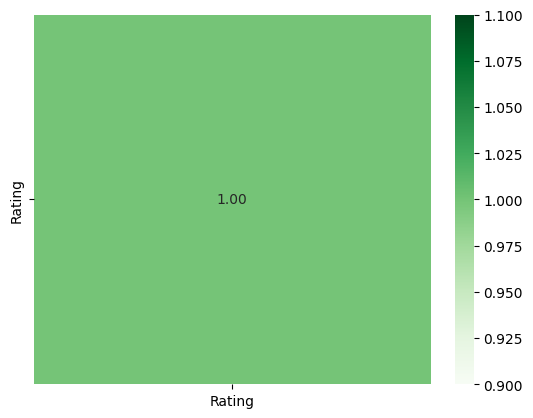

In [10]:
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Greens')

# Data Wrangling

In [11]:
# categorical data=['App','Category','Type','Content Rating','Genres']
# convert  categorical data to numerical data
def transform_categorical_column(data,column_name):
    categories=data[column_name].value_counts().index.to_list()
    categories_map={k:v for v,k in enumerate(categories)}
    reverse_categories_map={v:k for k,v in  categories_map.items()}
    data[column_name]=data[column_name].map(categories_map)
    return data,categories_map,reverse_categories_map

In [12]:
data,map_App,reverse_map_App=transform_categorical_column(data,'App')
data,map_Category,reverse_map_Category=transform_categorical_column(data,'Category')
data,map_Type,reverse_map_Type=transform_categorical_column(data,'Type')
data,map_Content_Rating,reverse_map_Content_Rating=transform_categorical_column(data,'Content Rating')
data,map_Genres,reverse_map_Genres=transform_categorical_column(data,'Genres')

In [13]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2609,28,4.1,159,19M,"10,000+",0,0,0,36,"January 7, 2018",1.0.0,4.0.3 and up
1,753,28,3.9,967,14M,"500,000+",0,0,0,87,"January 15, 2018",2.0.0,4.0.3 and up
2,5732,28,4.7,87510,8.7M,"5,000,000+",0,0,0,36,"August 1, 2018",1.2.4,4.0.3 and up
3,5731,28,4.5,215644,25M,"50,000,000+",0,0,1,36,"June 8, 2018",Varies with device,4.2 and up
4,5730,28,4.3,967,2.8M,"100,000+",0,0,0,66,"June 20, 2018",1.1,4.4 and up


In [14]:
corr=data.corr(method='pearson',numeric_only=True)

<AxesSubplot: >

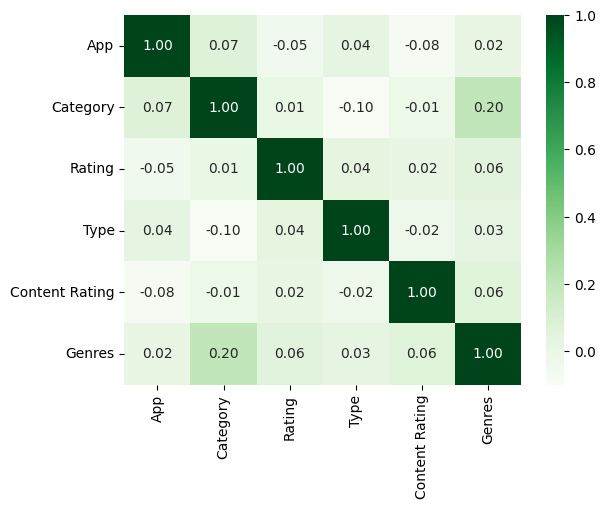

In [15]:
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Greens')

# Working with datetime , strptime and strftime

In [16]:
from datetime import datetime
data1=data.copy()
#data1['Last Updated']=[datetime.strptime(d,'%B%-d,%Y') for d in data1['Last Updated']] --not working
data1['Last Updated']=pd.to_datetime(data1['Last Updated'])
#data1['Last Updated']=[datetime.strftime(d,'%d/%m/%Y') for d in data1['Last Updated']] -- not working
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2609,28,4.1,159,19M,"10,000+",0,0,0,36,2018-01-07,1.0.0,4.0.3 and up
1,753,28,3.9,967,14M,"500,000+",0,0,0,87,2018-01-15,2.0.0,4.0.3 and up
2,5732,28,4.7,87510,8.7M,"5,000,000+",0,0,0,36,2018-08-01,1.2.4,4.0.3 and up
3,5731,28,4.5,215644,25M,"50,000,000+",0,0,1,36,2018-06-08,Varies with device,4.2 and up
4,5730,28,4.3,967,2.8M,"100,000+",0,0,0,66,2018-06-20,1.1,4.4 and up


# Visualization

> Reviews V/S Installs
* Figure size -(8x8) and name fig4
* plot name plt4

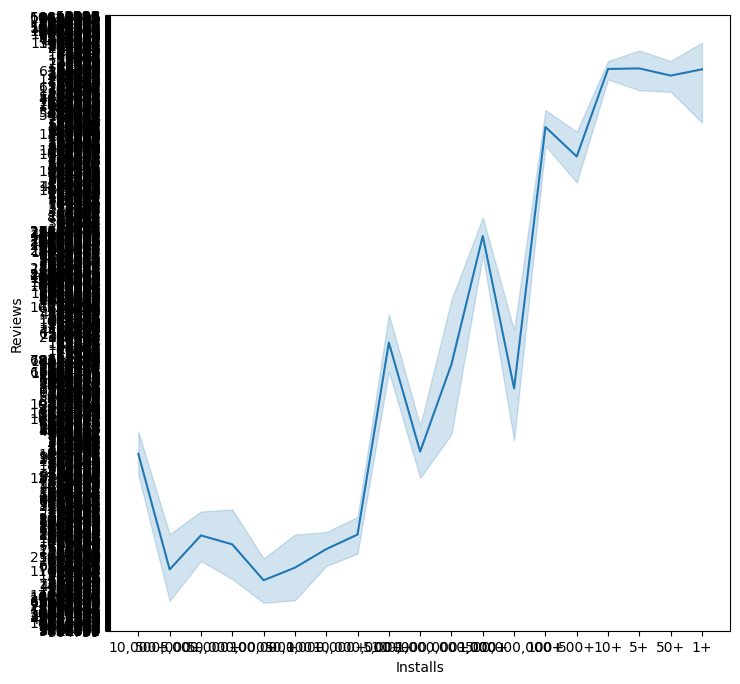

In [17]:
fig4=plt.figure(figsize=(8,8))
plt4=sns.lineplot(data=data,x='Installs',y='Reviews')

> Visualizing the category plot for app Category with count
* figure size (20,8)
* Category plot with height 8 and aspect ratio 2.5
* x-axis ticke labels with app Category and roatate to 90 degress

<Figure size 2000x800 with 0 Axes>

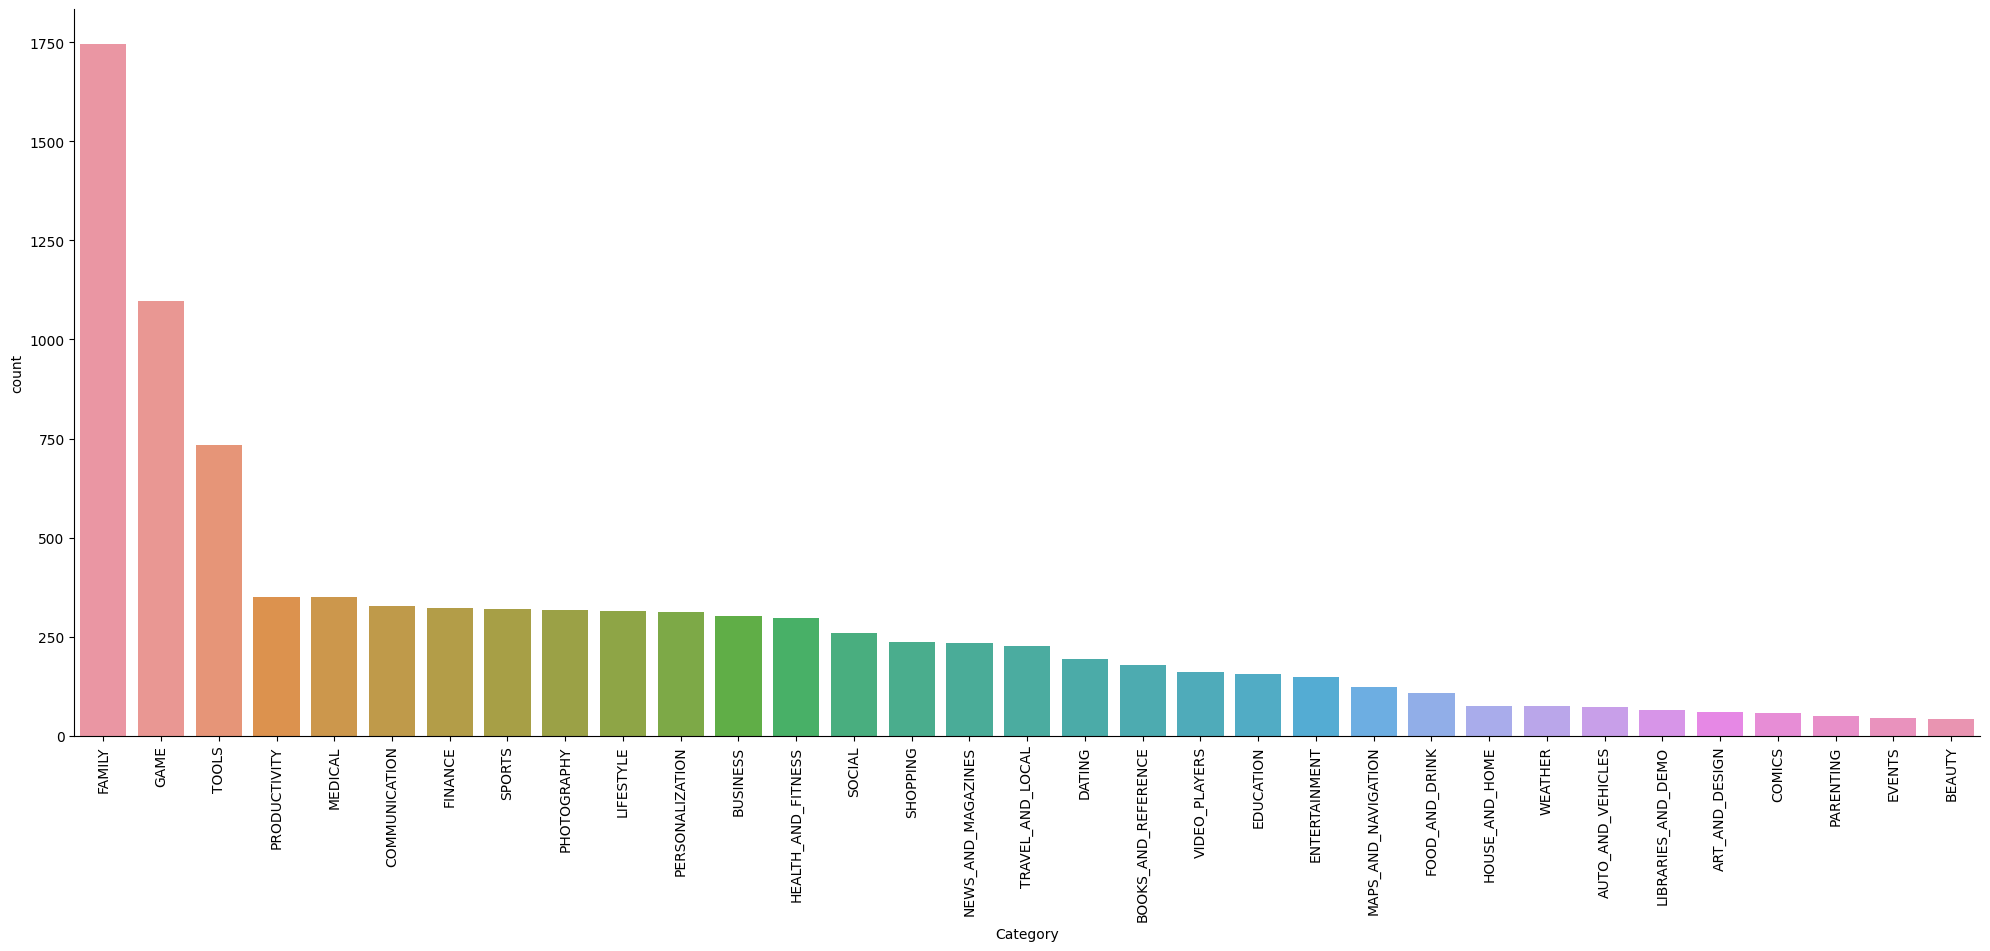

In [18]:
#visualizing the category plot for app Category
fig5=plt.figure(figsize=(20,8))
plt5=sns.catplot(data=data,x='Category',height=8,aspect=2.5, kind="count")
found_labels=list(map_Category.keys())
plt5.set_xticklabels(found_labels,rotation=90)

> Visualizing the category plot for app Content Rating with count
* figure size (20,8)
* Category plot with height 8 and aspect ratio 2.5
* x-axis ticke labels with app Category and rotate 90 degress

<Figure size 2000x800 with 0 Axes>

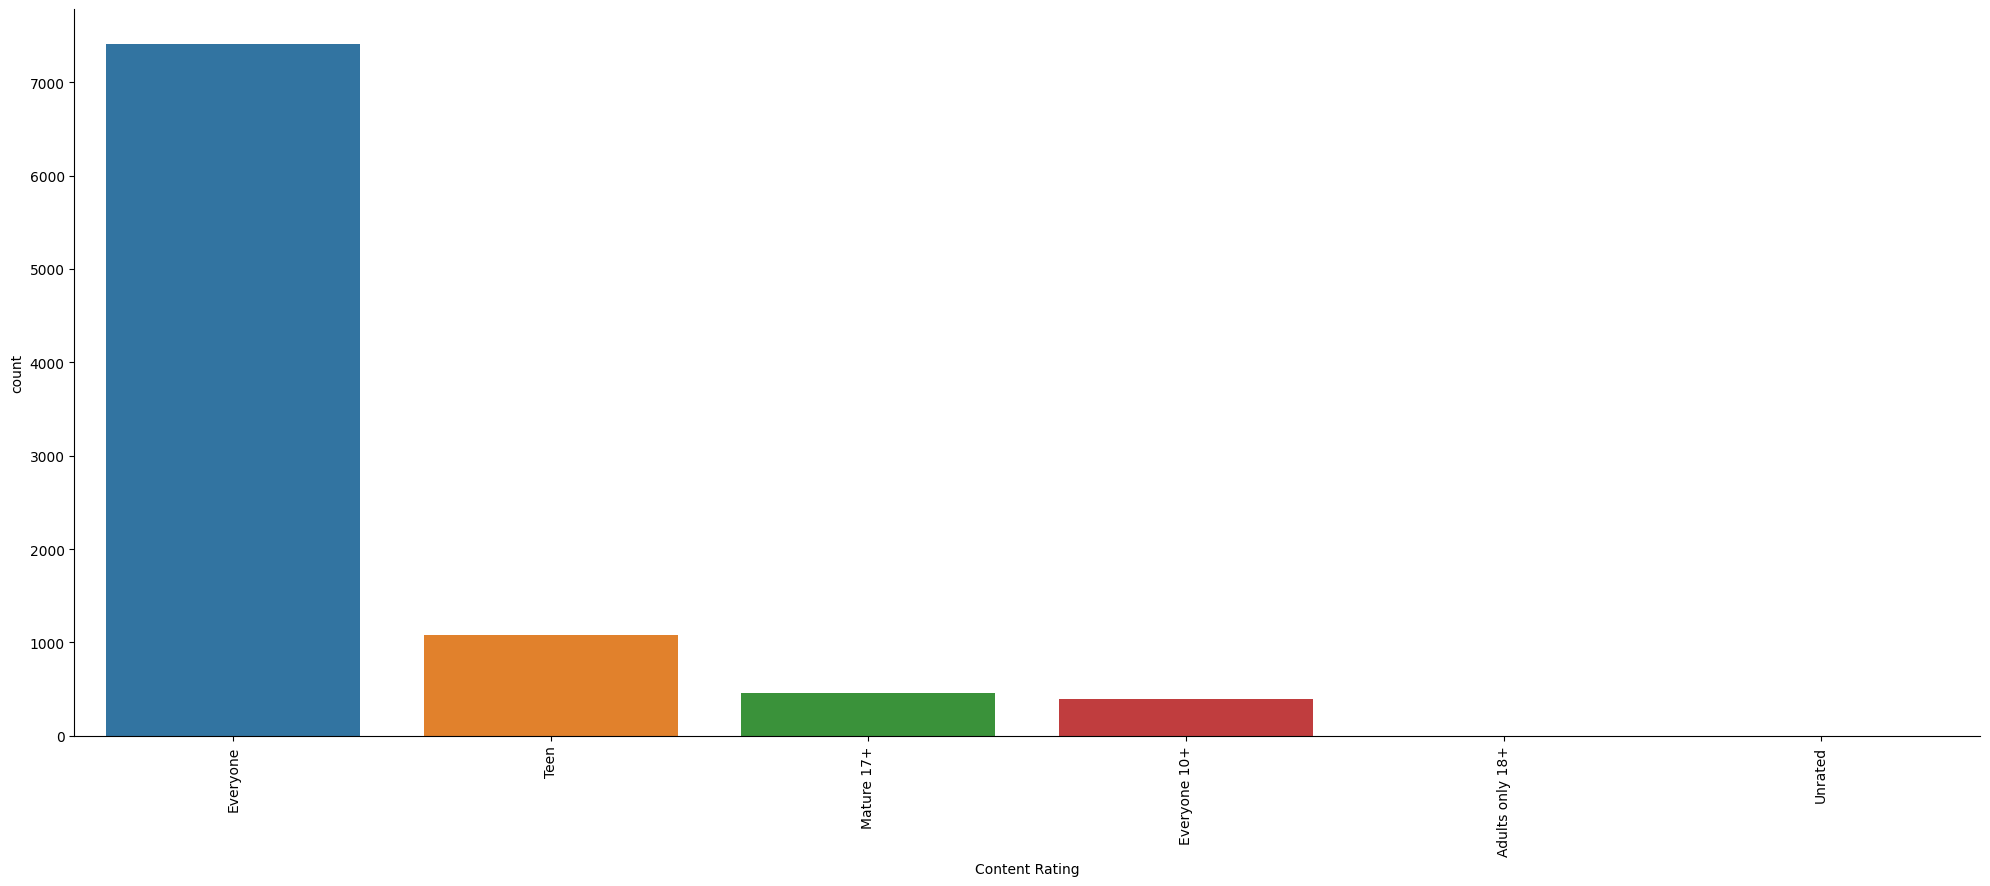

In [19]:
fig6=plt.figure(figsize=(20,8))
plt6=sns.catplot(data=data,x='Content Rating',height=8,aspect=2.5,kind='count')
found_labels_rating=list(map_Content_Rating.keys())
plt6.set_xticklabels(found_labels_rating,rotation=90)

> Visualizg the top 100 App Installs > 1000000 and Content Rating High
* figure size (20,8)
* Category plot with height 8 and aspect ratio 2.5
* x-axis ticke labels with app Category and rotate 90 degress

In [20]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9360, dtype: object

In [21]:
data['Installs']=data['Installs'].apply(lambda x:x.replace(',',''))
data['Installs']=data['Installs'].apply(lambda x:x.replace('+',''))
data['Installs']=pd.to_numeric(data['Installs'])

In [22]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [23]:
top_100_apps=data[data['Installs']>1000000]
top_100_apps=top_100_apps.sort_values(by='Rating',ascending=False).head(100)
top_100_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9625,2858,18,4.9,922752,Varies with device,10000000,0,0,0,22,"June 15, 2018",Varies with device,Varies with device
1260,364,12,4.9,272337,13M,10000000,0,0,0,13,"June 21, 2018",1.0.2,4.2 and up
1258,5949,12,4.9,38098,11M,5000000,0,0,0,13,"June 21, 2018",1.0.4,4.2 and up
4854,364,12,4.9,272172,13M,10000000,0,0,0,13,"June 21, 2018",1.0.2,4.2 and up
1765,60,1,4.8,230727,87M,10000000,0,0,0,48,"August 2, 2018",1.0.47,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,5094,10,4.7,1141545,15M,50000000,0,0,0,11,"July 31, 2018",Varies with device,Varies with device
6077,7,1,4.7,1535581,Varies with device,50000000,0,0,1,3,"July 23, 2018",2.12.5,4.1 and up
1693,6,1,4.7,990491,75M,10000000,0,0,0,3,"May 24, 2018",1.0.27,4.1 and up
3371,5088,10,4.7,202474,3.0M,10000000,0,0,1,11,"August 9, 2017",2.6.0,4.0 and up


<Figure size 2000x800 with 0 Axes>

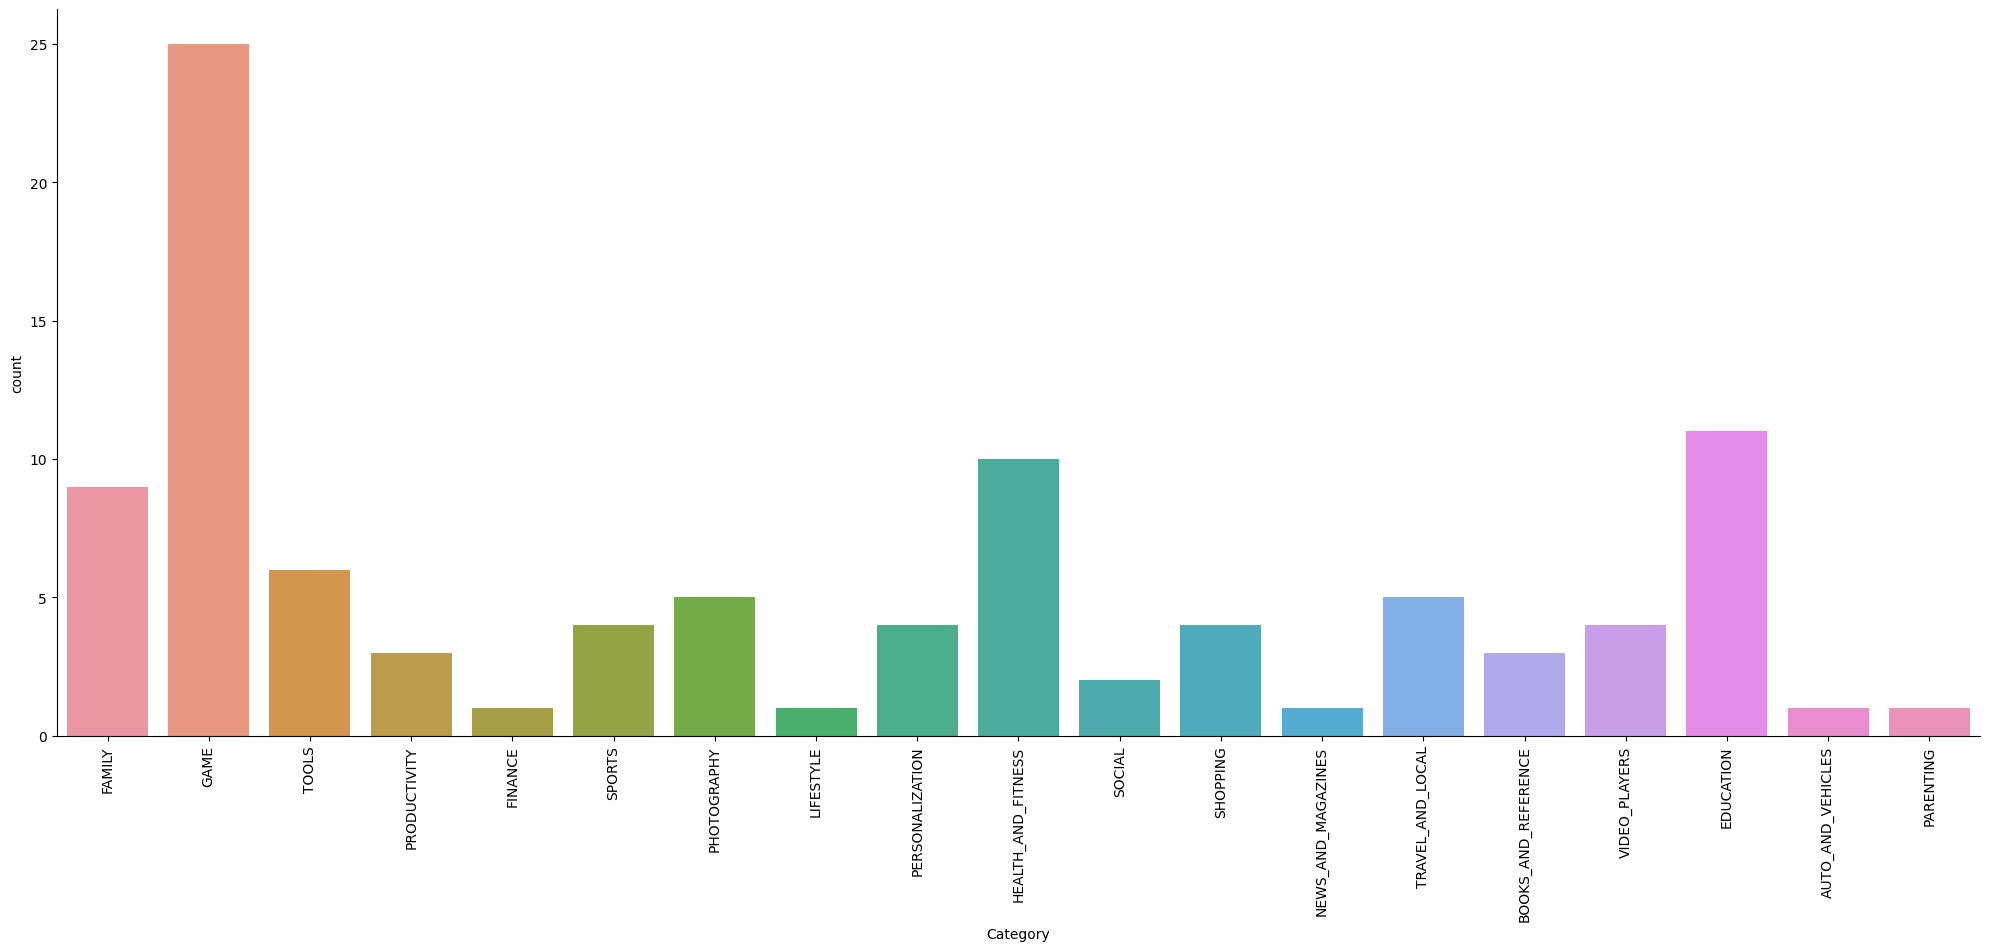

In [24]:
fig7=plt.figure(figsize=(20,8))
plt7=sns.catplot(data=top_100_apps,x='Category',height=8,aspect=2.5,kind='count')
found_labels_top=top_100_apps.Category.unique()
found_labels_top.sort()
found_labels_top=[reverse_map_Category[x] for x in found_labels_top]
plt7.set_xticklabels(found_labels_top,rotation=90)